In [1]:
import numpy as np 
import pandas as pd

In [2]:
Tran_Data = pd.read_csv('Tran_Data.csv')#Tran_Data

In [3]:
Tran_Data.head(5)

,TranId,TranDate,TranType,TranAmout,Fraud
0,258993,1/2/2008 1:04,Cash,2357,N
1,223712,1/2/2008 1:53,Transfer,421,N
2,22385,1/2/2008 2:04,Extra Payment,7225,N
3,72385,1/2/2008 2:04,Deposit,14449,N
4,122385,1/2/2008 2:04,Cash,1937,N


In [4]:
TranDate=pd.to_datetime(Tran_Data['TranDate']).dt.date
TranTime=pd.to_datetime(Tran_Data['TranDate']).dt.time

In [5]:
Tran_Data['TranDate']=TranDate
Tran_Data['TranTime']=TranTime

In [6]:
Tran_Data.head(25)

,TranId,TranDate,TranType,TranAmout,Fraud,TranTime
0,258993,2008-01-02,Cash,2357,N,01:04:00
1,223712,2008-01-02,Transfer,421,N,01:53:00
2,22385,2008-01-02,Extra Payment,7225,N,02:04:00
3,72385,2008-01-02,Deposit,14449,N,02:04:00
4,122385,2008-01-02,Cash,1937,N,02:04:00
5,219311,2008-01-02,Transfer,1655,N,02:21:00
6,295645,2008-01-02,Refund,178,N,02:23:00
7,185950,2008-01-02,Payment,2471,N,02:27:00
8,285776,2008-01-02,Retail,2014,N,02:56:00
9,288712,2008-01-02,Retail,795,N,02:57:00


Lets perfrom one hot encoding to change the categorical to continuos variables which can be helpful for training

In [7]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 

In [8]:
c1=le.fit_transform(Tran_Data['TranDate']) 
c2=le.fit_transform(Tran_Data['TranTime']) 

In [9]:
Tran_Data['TranDate']=c1
Tran_Data['TranTime']=c2

In [10]:
Tran_Data.head(5)

,TranId,TranDate,TranType,TranAmout,Fraud,TranTime
0,258993,0,Cash,2357,N,64
1,223712,0,Transfer,421,N,113
2,22385,0,Extra Payment,7225,N,124
3,72385,0,Deposit,14449,N,124
4,122385,0,Cash,1937,N,124


In [11]:
new_col=pd.get_dummies(Tran_Data.TranType)
new_col

,Cash,Deposit,EMI,Extra Payment,Payment,Refund,Retail,Transfer,Withdrawl
0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
299995,0,0,0,0,0,0,0,0,1
299996,0,0,0,0,0,0,1,0,0
299997,1,0,0,0,0,0,0,0,0
299998,0,0,0,0,0,0,0,1,0


In [12]:
new_col=pd.DataFrame(new_col)

In [13]:
Tran_Data=pd.concat([Tran_Data, new_col], axis=1)

In [14]:
Temp = Tran_Data.pop('Fraud')
new_df = pd.concat([Tran_Data, Temp], 1)
Tran_Data=new_df


In [15]:
Tran_Data=Tran_Data.drop(['TranType'], axis = 1) 

In [16]:
Tran_Data.head()

,TranId,TranDate,TranAmout,TranTime,Cash,Deposit,EMI,Extra Payment,Payment,Refund,Retail,Transfer,Withdrawl,Fraud
0,258993,0,2357,64,1,0,0,0,0,0,0,0,0,N
1,223712,0,421,113,0,0,0,0,0,0,0,1,0,N
2,22385,0,7225,124,0,0,0,1,0,0,0,0,0,N
3,72385,0,14449,124,0,1,0,0,0,0,0,0,0,N
4,122385,0,1937,124,1,0,0,0,0,0,0,0,0,N


In [17]:
Tran_Data.shape

(300000, 14)

In [18]:
Tran_Data.describe()

,TranId,TranDate,TranAmout,TranTime,Cash,Deposit,EMI,Extra Payment,Payment,Refund,Retail,Transfer,Withdrawl
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,150000.500000,1832.077717,3390.753000,719.108253,0.222717,0.082990,0.083677,0.082990,0.111203,0.110570,0.111393,0.110783,0.083677
std,86602.684716,1057.308565,4228.841578,415.850545,0.416070,0.275868,0.276903,0.275868,0.314384,0.313599,0.314619,0.313864,0.276903
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75000.750000,916.000000,908.000000,359.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,150000.500000,1832.000000,1825.000000,716.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,225000.250000,2748.000000,3318.250000,1079.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,300000.000000,3668.000000,20000.000000,1439.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
Tran_Data.isnull().sum()

TranId           0
TranDate         0
TranAmout        0
TranTime         0
Cash             0
Deposit          0
EMI              0
Extra Payment    0
Payment          0
Refund           0
Retail           0
Transfer         0
Withdrawl        0
Fraud            0
dtype: int64

There are no nulls so we can proceed for viewing **Data** **Distribution**

In [20]:
import seaborn as sns

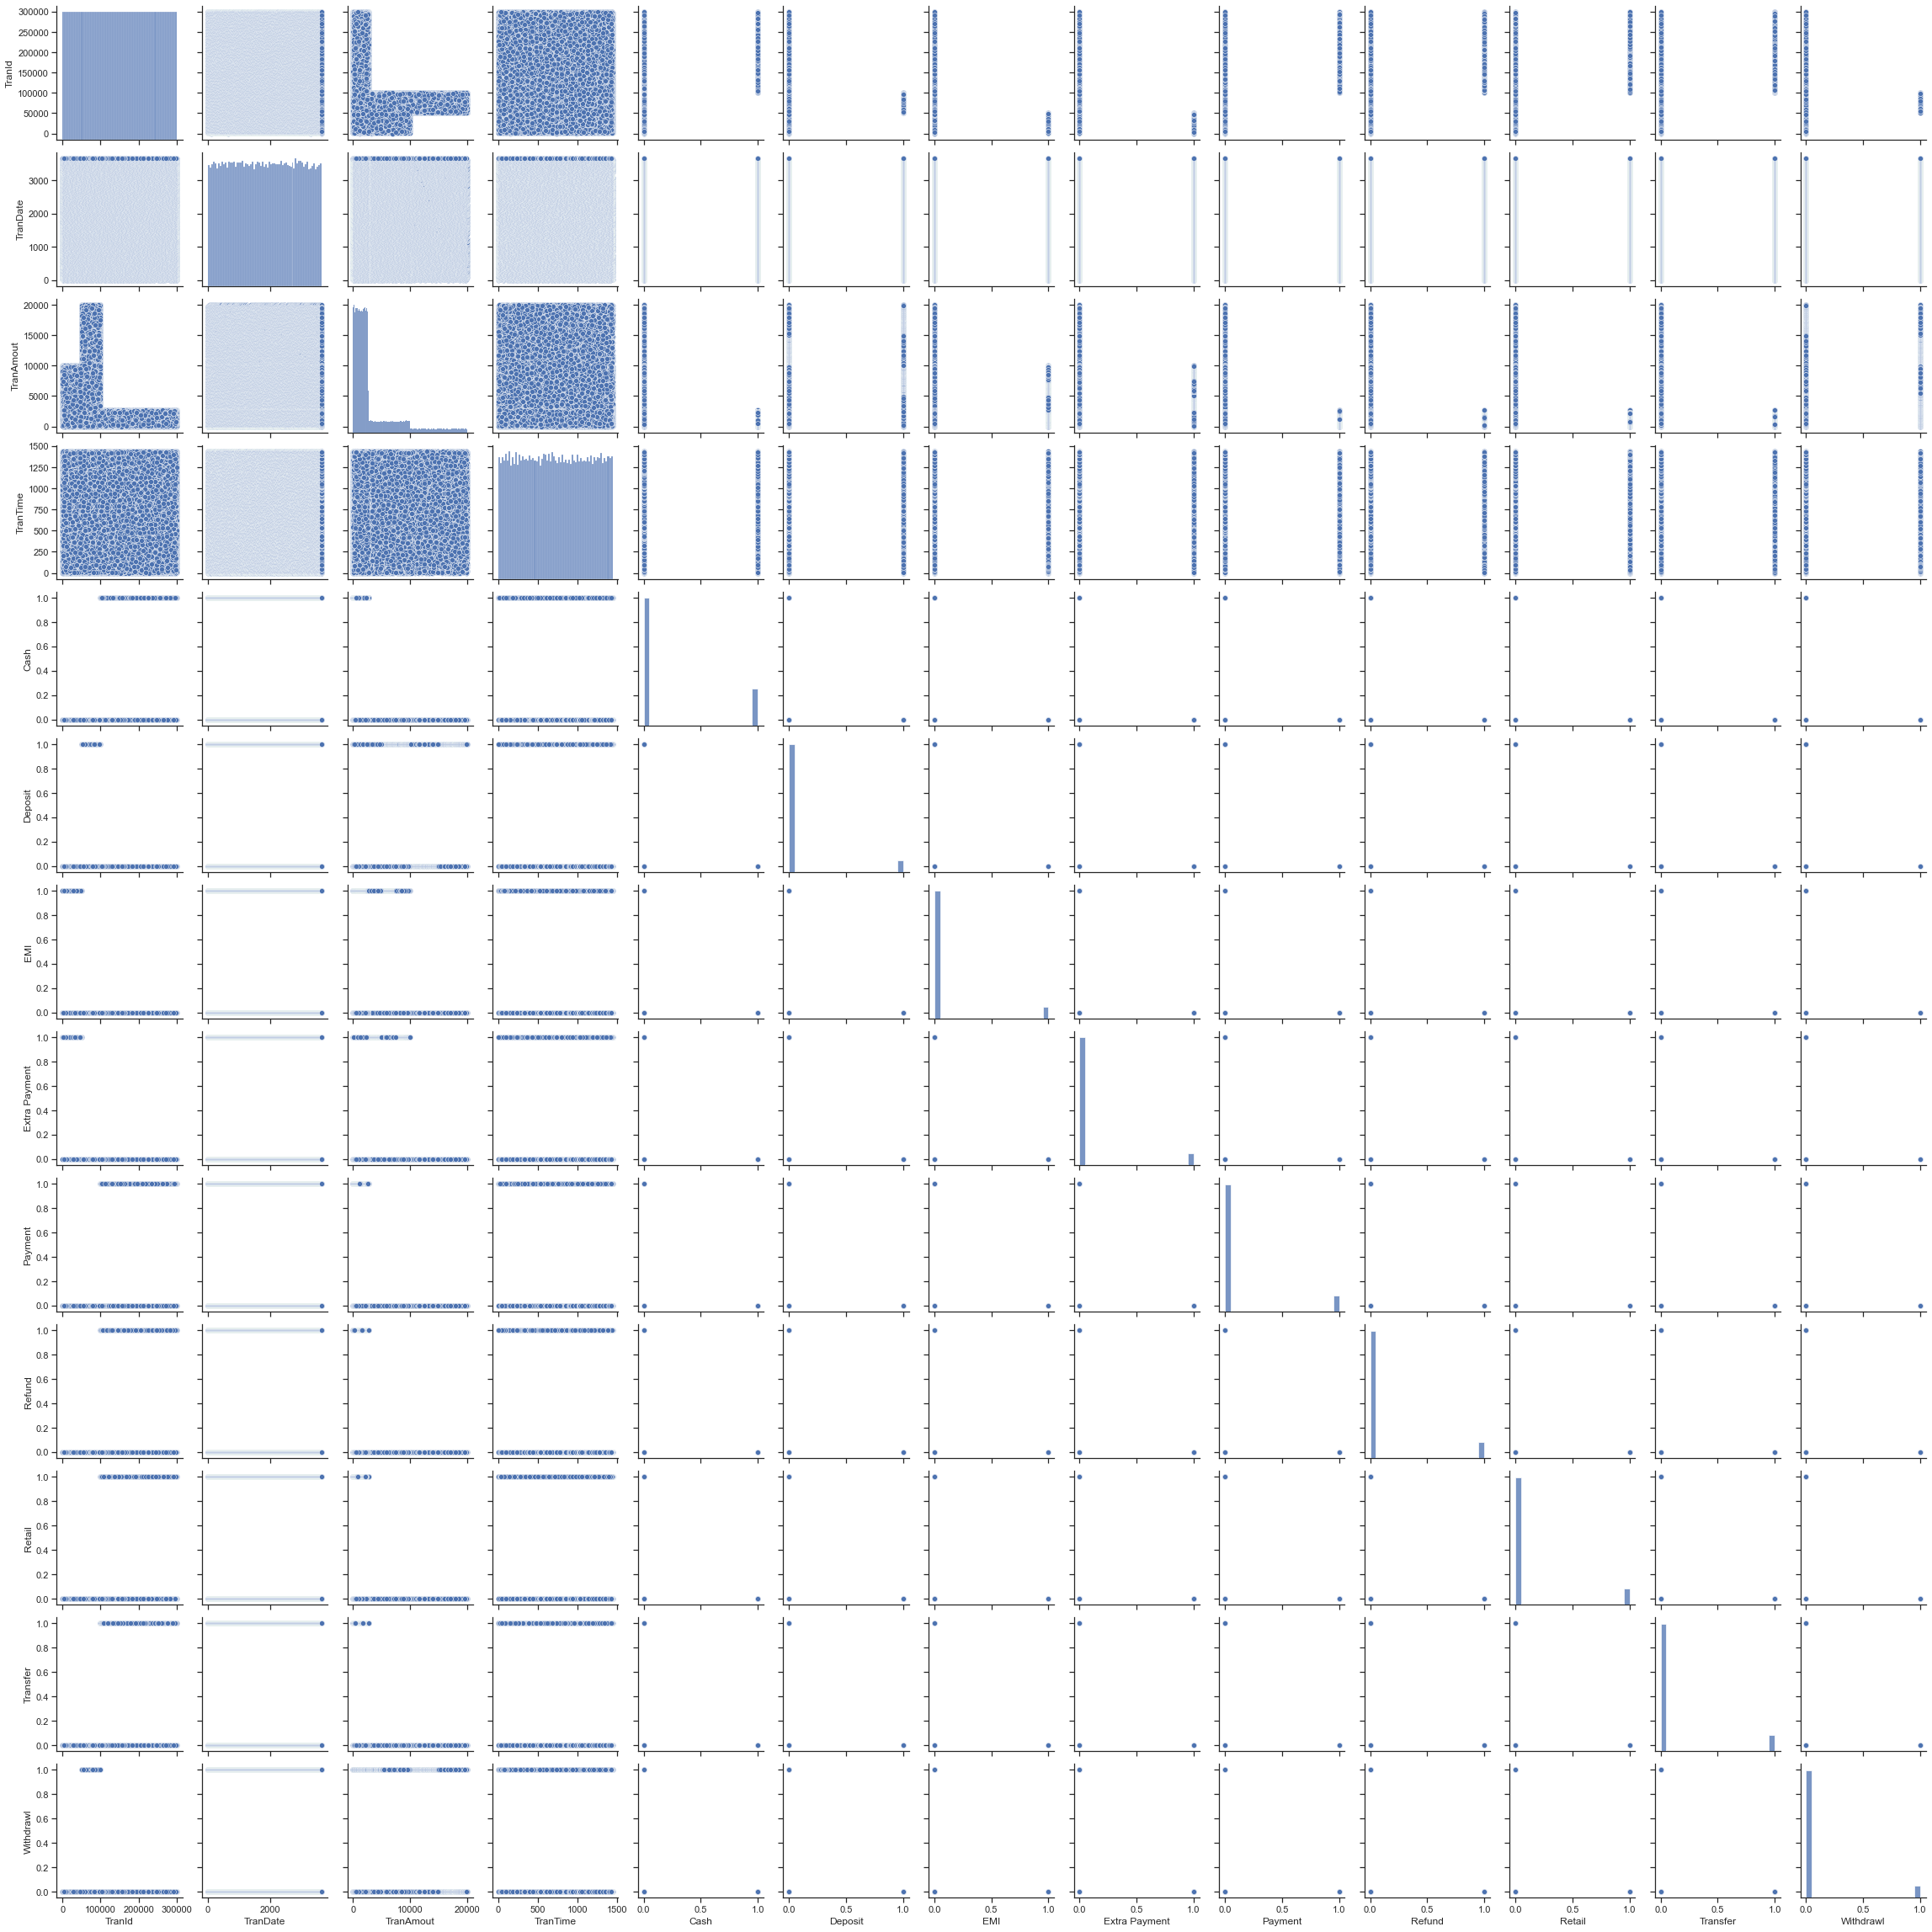

In [21]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(Tran_Data)

Plot scatterplots and distributions of numerical features to see how they may affect the output 'area'

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

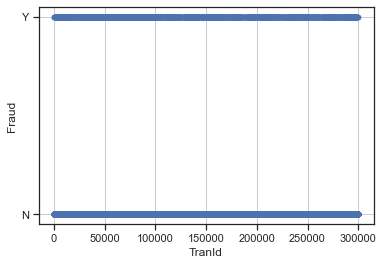

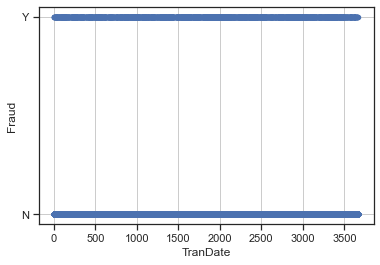

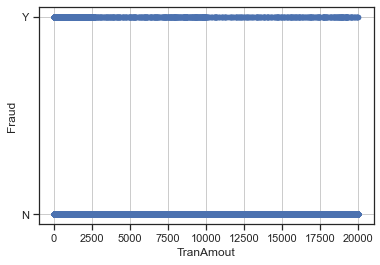

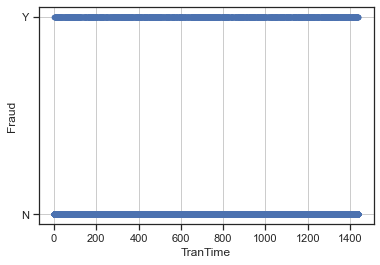

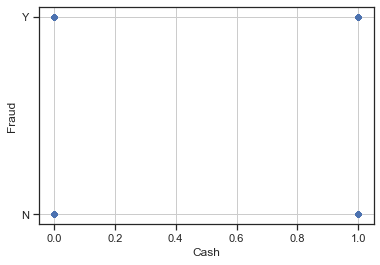

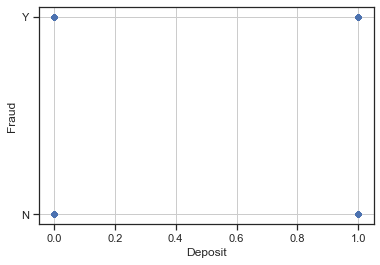

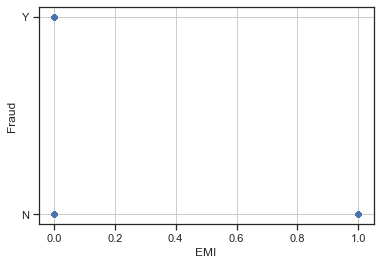

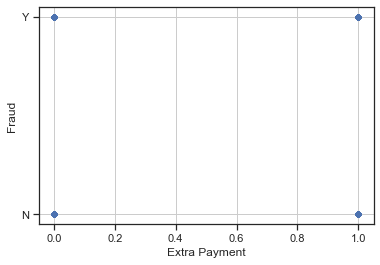

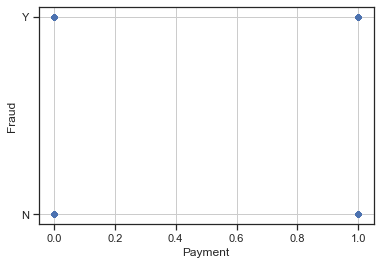

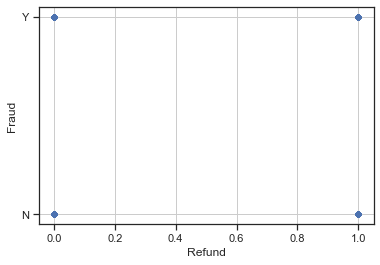

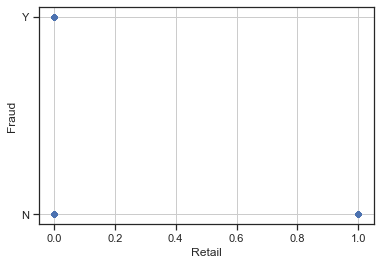

In [22]:
for i in Tran_Data.describe().columns[:-2]:Tran_Data.plot.scatter(i,'Fraud',grid=True)

Plot boxplots of how the categorical features (month and day) affect the outcome

In [23]:
Tran_Data.head(5)

,TranId,TranDate,TranAmout,TranTime,Cash,Deposit,EMI,Extra Payment,Payment,Refund,Retail,Transfer,Withdrawl,Fraud
0,258993,0,2357,64,1,0,0,0,0,0,0,0,0,N
1,223712,0,421,113,0,0,0,0,0,0,0,1,0,N
2,22385,0,7225,124,0,0,0,1,0,0,0,0,0,N
3,72385,0,14449,124,0,1,0,0,0,0,0,0,0,N
4,122385,0,1937,124,1,0,0,0,0,0,0,0,0,N


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
test_size=0.3

In [26]:
X_data=Tran_Data.drop(['Fraud'],axis=1)

In [27]:
y_data=Tran_Data.drop(['TranId','TranDate','TranAmout','TranTime','Cash','Deposit','EMI','Extra Payment','Payment','Refund','Retail','Transfer','Withdrawl'],axis=1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

In [29]:
#y_train=y_train.reshape(y_train.size,1)
y_train=y_train.values.reshape(-1,1)

In [30]:
y_train.shape

(210000, 1)

In [31]:
X_train

,TranId,TranDate,TranAmout,TranTime,Cash,Deposit,EMI,Extra Payment,Payment,Refund,Retail,Transfer,Withdrawl
78822,38096,962,913,1244,0,0,1,0,0,0,0,0,0
133357,20067,1628,825,672,0,0,1,0,0,0,0,0,0
106764,154359,1302,2203,1241,0,0,0,0,0,0,0,1,0
261443,134912,3190,2576,633,0,0,0,0,0,1,0,0,0
140513,31867,1715,1027,1262,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71718,100413,876,1280,854,1,0,0,0,0,0,0,0,0
60058,111490,735,1873,1351,0,0,0,0,0,0,0,1,0
274146,172786,3349,1851,161,1,0,0,0,0,0,0,0,0
138646,119868,1692,1483,706,0,0,0,0,0,0,1,0,0


In [32]:
y_train

array([['N'],
       ['N'],
       ['N'],
       ...,
       ['N'],
       ['N'],
       ['N']], dtype=object)

In [33]:
X_test

,TranId,TranDate,TranAmout,TranTime,Cash,Deposit,EMI,Extra Payment,Payment,Refund,Retail,Transfer,Withdrawl
203409,277154,2483,1450,1243,1,0,0,0,0,0,0,0,0
225016,272805,2748,1489,521,1,0,0,0,0,0,0,0,0
37662,175822,463,2464,712,1,0,0,0,0,0,0,0,0
283772,62337,3467,1302,939,0,1,0,0,0,0,0,0,0
134865,164510,1646,1552,553,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65730,237615,804,2211,635,1,0,0,0,0,0,0,0,0
154075,105129,1881,833,900,0,0,0,0,0,1,0,0,0
123641,92638,1511,9490,619,0,0,0,0,0,0,0,0,1
129724,174663,1585,312,876,1,0,0,0,0,0,0,0,0


In [34]:
y_test

,Fraud
203409,N
225016,N
37662,N
283772,N
134865,N
...,...
65730,N
154075,N
123641,N
129724,N


In [35]:
#SVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [36]:
scaler = StandardScaler()

In [37]:
#Logistic Regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [38]:
model=LogisticRegression(solver='liblinear', random_state=0)

In [39]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0, solver='liblinear')

In [40]:
model.classes_

array(['N', 'Y'], dtype=object)

In [41]:
probab=model.predict_proba(X_test)

In [42]:
probab

array([[9.99644930e-01, 3.55069698e-04],
       [9.98837292e-01, 1.16270804e-03],
       [9.86911060e-01, 1.30889402e-02],
       ...,
       [9.92743036e-01, 7.25696383e-03],
       [9.93929104e-01, 6.07089610e-03],
       [9.96070997e-01, 3.92900319e-03]])

In [43]:
predicted=model.predict(X_test)

In [44]:
model.score(X_train,y_train)

0.9905333333333334

In [45]:
confusion_matrix(y_test, model.predict(X_test))

array([[89103,     0],
       [  897,     0]], dtype=int64)

In [46]:
'''
8921 true negative predictions
875 false negative predictions
No  false positive prediction
No  true positive predictions
'''

'\n8921 true negative predictions\n875 false negative predictions\nNo  false positive prediction\nNo  true positive predictions\n'

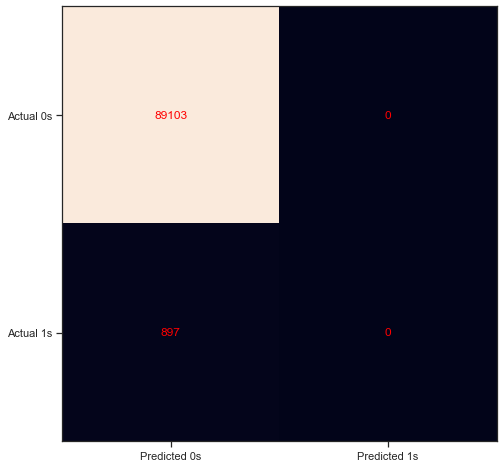

In [47]:
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [48]:
print(classification_report(y_test, model.predict(X_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           N       0.99      1.00      0.99     89103
           Y       0.00      0.00      0.00       897

    accuracy                           0.99     90000
   macro avg       0.50      0.50      0.50     90000
weighted avg       0.98      0.99      0.99     90000



In [49]:
accuracy_score(y_test,predicted)

0.9900333333333333

In [50]:
accuracy_score(y_test,predicted, normalize=False)

89103

In [51]:
y_test.shape

(90000, 1)

In [52]:
temp=y_test.to_numpy()
for i in range(50):
    print(predicted[i],"   ",temp[i])

N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']
N     ['N']


In [53]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

<ipython-input-53-894c3a7f4065>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [57]:
print(confusion_matrix(y_test,y_pred))

[[89103     0]
 [  897     0]]


In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.99      1.00      0.99     89103
           Y       0.00      0.00      0.00       897

    accuracy                           0.99     90000
   macro avg       0.50      0.50      0.50     90000
weighted avg       0.98      0.99      0.99     90000



In [59]:
print(accuracy_score(y_test, y_pred))

0.9900333333333333


In [73]:
from sklearn.naive_bayes import GaussianNB

In [71]:
def mfunc(X, y, typ):
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    
    model = typ
    clf = model.fit(X_train, y_train)

    
    pred_labels = model.predict(X_test)

     
    print('Classes: ', clf.classes_) 
    if str(typ)=='GaussianNB()':
        print('Class Priors: ',clf.class_prior_) 
    else: 
        print('Class Log Priors: ',clf.class_log_prior_) 
        
    
    print('--------------------------------------------------------')
    score = model.score(X_test, y_test)
    print('Accuracy Score: ', score)
    print('--------------------------------------------------------')
    
   
    print(classification_report(y_test, pred_labels))
    

    return X_train, X_test, y_train, y_test, clf, pred_labels

In [74]:
X_train, X_test, y_train, y_test, clf, pred_labels, = mfunc(X_data, y_data, GaussianNB())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Classes:  ['N' 'Y']
Class Priors:  [0.990325 0.009675]
--------------------------------------------------------
Accuracy Score:  0.9906166666666667
--------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           N       0.99      1.00      1.00     59437
           Y       0.00      0.00      0.00       563

    accuracy                           0.99     60000
   macro avg       0.50      0.50      0.50     60000
weighted avg       0.98      0.99      0.99     60000

